In [52]:
import pandas as pd

#baca file csv
df = pd.read_csv(r'D:\tugas\tugas ml\comparison between Rusher and Support roles in Free Fire.csv')

df.head(3)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   PlayerID    158 non-null    int64 
 1   Role        158 non-null    object
 2   Age         158 non-null    int64 
 3   AvgDmg(%)   158 non-null    int64 
 4   Winrate(%)  158 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 6.3+ KB


In [53]:
df.head()

,PlayerID,Role,Age,AvgDmg(%),Winrate(%)
0,1,Rusher,19,15,39
1,2,Rusher,21,15,81
2,3,Support,20,16,66
3,4,Rusher,23,16,77
4,5,Rusher,31,17,40


In [54]:
df = df.rename(columns={'Role': 'role', 'Age': 'age',
                        'AvgDmg(%)': 'avgdmg',
                        'Winrate(%)': 'winrate'})

In [55]:
df.head(25)

,PlayerID,role,age,avgdmg,winrate
0,1,Rusher,19,15,39
1,2,Rusher,21,15,81
2,3,Support,20,16,66
3,4,Rusher,23,16,77
4,5,Rusher,31,17,40
5,6,Rusher,22,17,76
6,7,Support,35,18,68
7,8,Support,23,18,94
8,9,Rusher,64,19,33
9,10,Rusher,30,19,72


In [56]:
# ubah data kategorik menjadi data numerik
df['role'].replace(['Rusher', 'Support'], [0,1], inplace=True)

In [57]:
X = df.drop(['PlayerID', 'role'], axis=1)

X.head()

,age,avgdmg,winrate
0,19,15,39
1,21,15,81
2,20,16,66
3,23,16,77
4,31,17,40


In [63]:
from sklearn.cluster import KMeans

#membuat list yang berisi inertia
clusters = []
for i in range(1,11):
  km = KMeans(n_clusters=i).fit(X)
  clusters.append(km.inertia_)


c:\Users\RADJA KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RADJA KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RADJA KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\RADJA KOMPUTER\AppData\Local\Programs\Python\Pyth

Text(0, 0.5, 'Inertia')

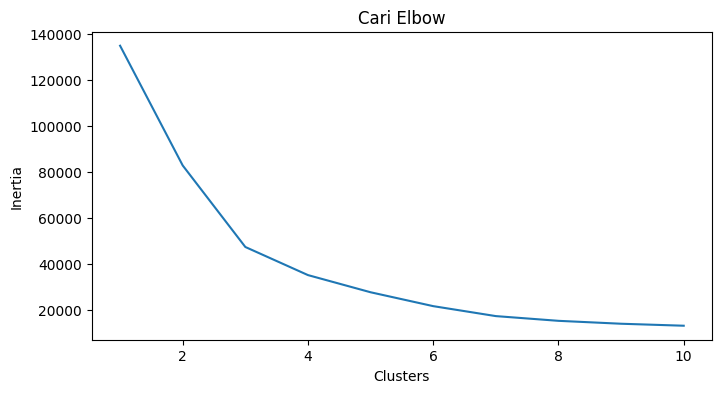

In [59]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# membuat plot inertia
fig, ax = plt.subplots(figsize=(8, 4))
sns.lineplot(x=list(range(1, 11)), y=clusters, ax=ax)
ax.set_title('Cari Elbow')
ax.set_xlabel('Clusters')
ax.set_ylabel('Inertia')

In [60]:
# membuat objek KMeans
km5 = KMeans(n_clusters=5).fit(X)

c:\Users\RADJA KOMPUTER\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [61]:
# menambahkan kolom label pada dataset
X['Labels'] = km5.labels_

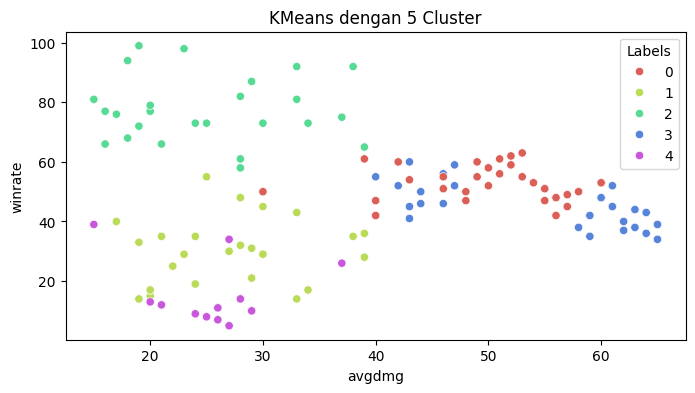

In [62]:
# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['avgdmg'], y=X['winrate'], hue=X['Labels'],
                palette=sns.color_palette('hls', 5))
plt.title('KMeans dengan 5 Cluster')
plt.show()